- Below is the process we can follow for real estate price prediction to help individuals and businesses make informed decisions in the real estate market:

- Gather relevant data from various sources, including real estate databases, government records, online listings, and other public or private sources.
- Clean and prepare the collected data by handling missing values, removing outliers, and converting categorical variables into numerical representations.
- Create new features or transform existing ones to capture important information that can influence real estate prices.
- Explore and visualize the data to gain insights into its distribution, correlations, and patterns.
- Choose appropriate machine learning algorithms or predictive models for the task.
- Train the selected model on the training data, optimizing its parameters to make accurate predictions.

#Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loding data set

In [ ]:
df=pd.read_csv('/content/Real_Estate.csv')

In [ ]:
df.shape

(414, 7)

In [ ]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


The dataset contains 7 columns.

- Transaction date: The date of the real estate transaction.
- House age: Age of the house in years.
- Distance to the nearest MRT station: Distance to the nearest Mass Rapid - - - Transit station in meters.
- Number of convenience stores: Number of convenience stores in the vicinity.
- Latitude: Latitude of the property location.
- Longitude: Longitude of the property location.
House price of unit area: House price of unit area.

In [ ]:
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [ ]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [ ]:
df.isnull().sum()

,0
Transaction date,0
House age,0
Distance to the nearest MRT station,0
Number of convenience stores,0
Latitude,0
Longitude,0
House price of unit area,0


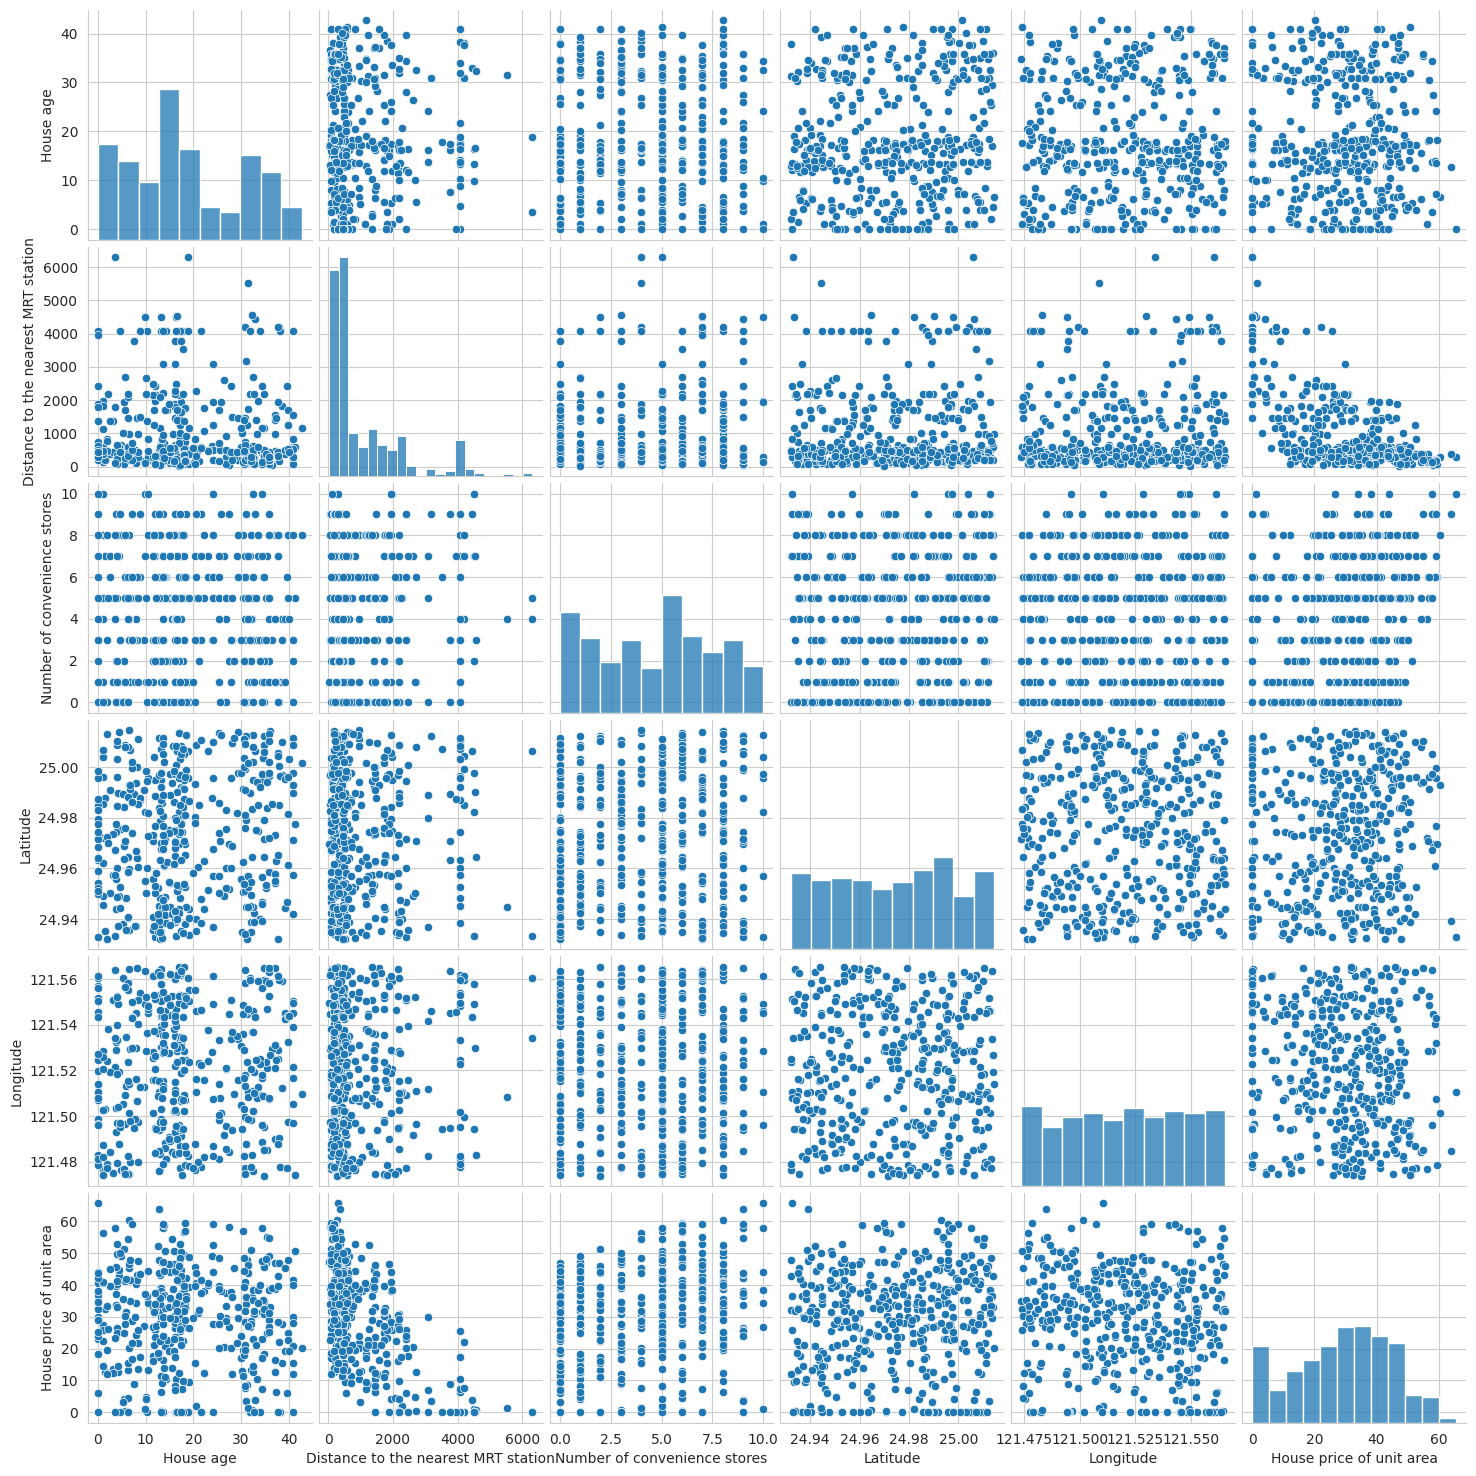

In [ ]:
# prompt: we want to draw scater plot with ecach atttributes

# Select only the numerical columns for plotting
numerical_cols = df.select_dtypes(include=np.number).columns

# Create scatter plots for each attribute against each other (pairwise)
sns.pairplot(df[numerical_cols])
plt.show()

- House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.
- Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.
- Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.
- Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.

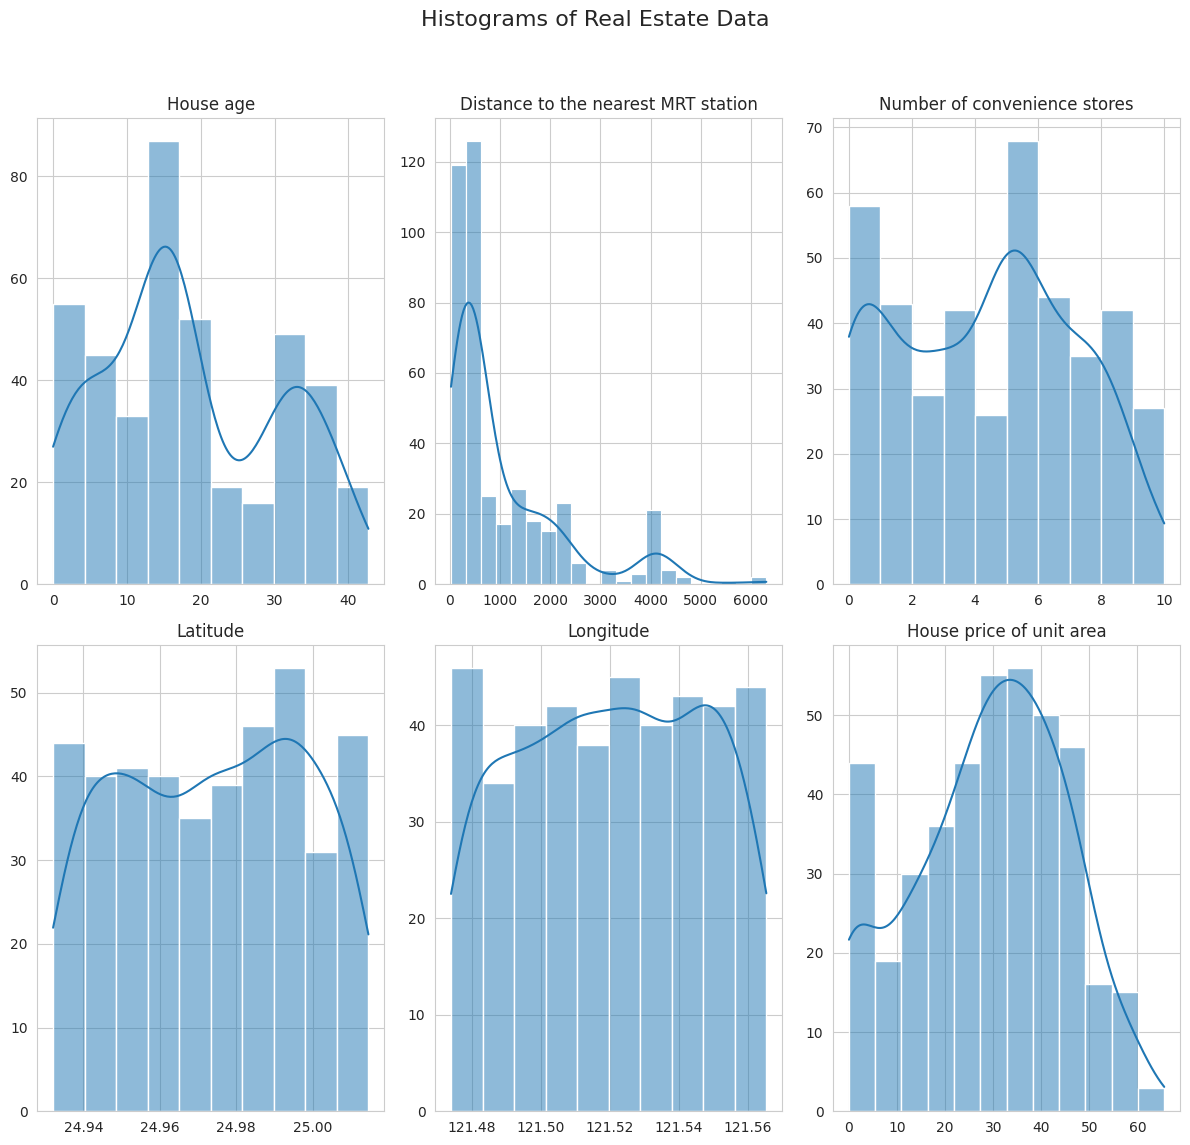

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

plt.tight_layout(rect= [0, 0.03, 1, 0.95])
plt.show()

- House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).
- Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.
- Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.
- Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.
- House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

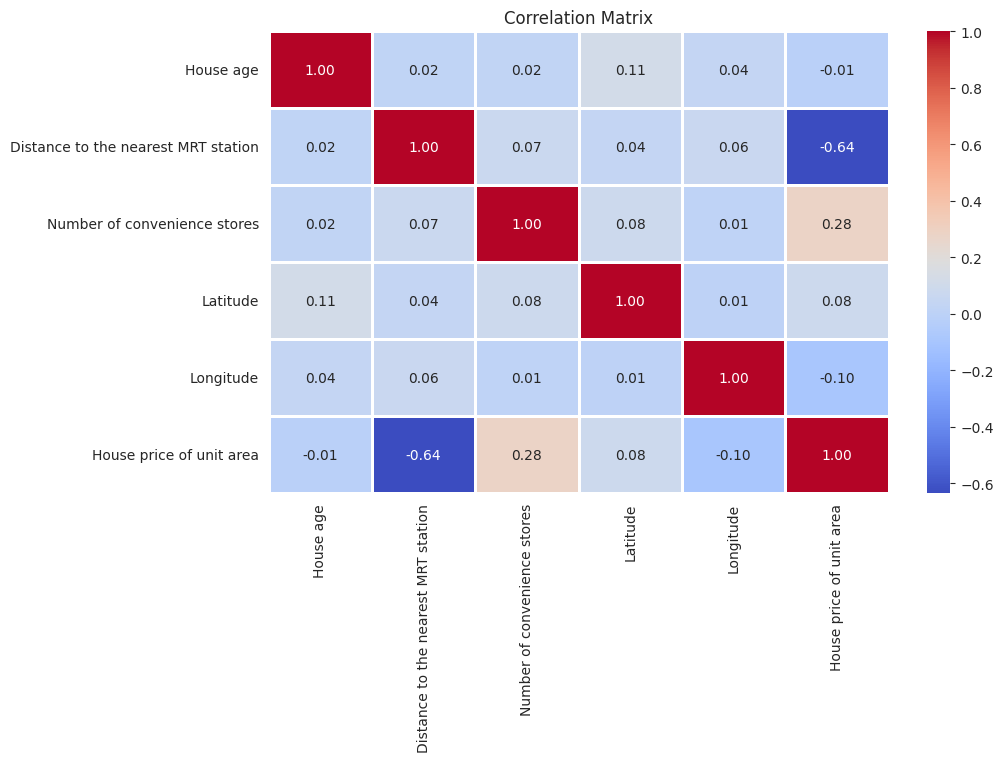

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [ ]:
#correlation matrix
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

- House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.
- Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.
- Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.
- Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
features=['House age', 'Distance to the nearest MRT station', 'Number of convenience stores','Latitude', 'Longitude']
target=['House price of unit area']

In [ ]:
x=df[features]
y=df[target]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2 , random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr=model.predict(x_test)

In [ ]:
print(y_pred_lr)

[[38.57967617]
 [30.27609825]
 [30.6148517 ]
 [45.38701038]
 [23.22179398]
 [32.61823307]
 [18.88904266]
 [29.93669789]
 [34.09959966]
 [ 5.880257  ]
 [32.87903471]
 [39.19535229]
 [ 9.53473681]
 [26.61428544]
 [36.44367891]
 [30.26629893]
 [28.06610431]
 [25.24736876]
 [32.25004015]
 [35.66460277]
 [40.13079962]
 [43.48548399]
 [25.01190288]
 [26.25994847]
 [17.96317394]
 [35.1153802 ]
 [ 6.81454173]
 [32.53540782]
 [43.987473  ]
 [32.60859929]
 [35.39837154]
 [41.43669367]
 [46.47139497]
 [47.37289674]
 [30.9658036 ]
 [29.07482604]
 [10.43432846]
 [41.18213366]
 [40.61118946]
 [36.74681106]
 [40.88032512]
 [36.19356287]
 [11.09684685]
 [-0.15253801]
 [35.96982075]
 [25.71288127]
 [45.6599185 ]
 [38.33513258]
 [21.23174286]
 [38.95570079]
 [-1.30433674]
 [31.2585822 ]
 [29.54194026]
 [33.57109743]
 [39.23422904]
 [32.79981935]
 [36.75538814]
 [37.20549521]
 [44.96061979]
 [31.19441284]
 [16.47944682]
 [13.76615058]
 [29.077178  ]
 [37.78745647]
 [20.91849415]
 [24.50593074]
 [34.12784

In [ ]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred_lr)

# Calculate Adjusted R-squared
n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of predictor variables
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_lr)

print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.5496
Adjusted R-squared: 0.5203
Mean Squared Error: 124.6091


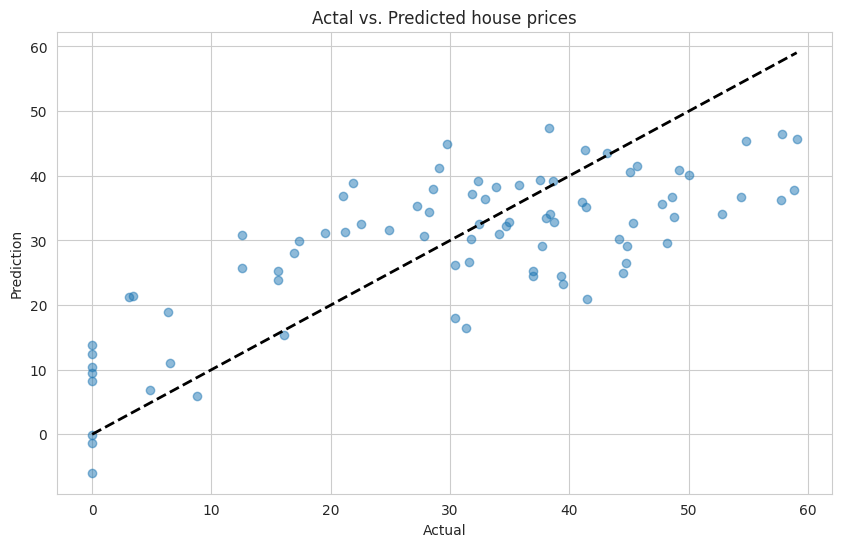

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr , alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()] ,'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actal vs. Predicted house prices')
plt.show()

- Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
- Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

In [ ]:
!pip install dash


In [ ]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),

        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),

        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'),
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]],
                                columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>